In [ ]:
# An example of some of the basic statistical functionality of Python
# This will demonstrate a uniform, normal, and bynomial distribution

In [1]:
# Boilerplate
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize the random seed.  As long as this remainst the same, the output will remain the same
np.random.seed(57884776)

s=  [0.58798606 0.41969041 0.22327461 0.19860196 0.2643132  0.75951322
 0.69684888 0.43021883 0.62498915 0.95161756]
bins=  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
hist=  [ 9910. 10028. 10006.  9892. 10023.  9914.  9925. 10064.  9891.  9874.]
Average contents =  10000.0
Standard deviation =  95.77943411818636


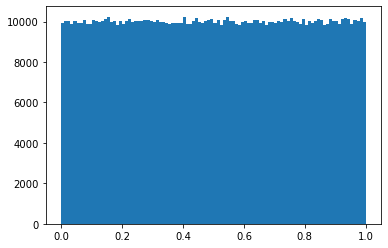

In [3]:
# Uniform distribution of N events from min to max
min=0.
max=1.
N=1000000
nbins=100  # Number of histogram bins
s = np.random.uniform(min,max,N)  # generate a uniform array of values
print('s= ',s[:10])  #Print 1st 10 values
# Build a histogram.  There are more versatile ways to do this, but we're using the simplest
h = plt.hist(s,nbins,(min,max))  # Make a histogram of the values.  Returns a 2D array with contents and bin locations
# print the lower bin boundary and the values
print('bins= ',h[1][:10])
print('hist= ',h[0][:10])
print('Average contents = ',h[0].mean())   # Average value IN the bins
print('Standard deviation = ',h[0].std())  # Std deviation values in the bins

s=  [14.18817066 10.36042597  6.1621874   7.77367835  7.54480463  9.21880793
 10.98498819  5.37112781  9.92896331 10.47698885]
Average contents =  10.004003235662344
Standard deviation =  1.9999803259742117


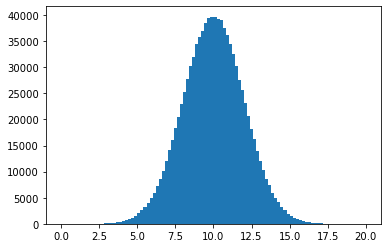

In [4]:
# Normal distribution of N events with specified mean and sigma
mean = 10.
sigma = 2.
N=1000000
nbins=100
s = np.random.normal(mean,sigma,N)  # Generate a normal distribution 
print('s= ',s[:10])  #Print 1st 10 values
# Build a histogram
h = plt.hist(s,nbins,(mean-5.*sigma,mean+5.*sigma))  #  with boundaries of + and - 5 sigma
# print the lower bin boundary and the values
print('Average contents = ',s.mean())
print('Standard deviation = ',s.std())


In [ ]:
# Binomial Distribution with probability p and N throws
p = 1/2       # probability
N=10     # number of throws
ntrial=100000  # number of times to repeat the experiment
s = np.random.binomial(N,p,ntrial)  # Generate a normal distribution with an RMS of 1 and a mean of zero
# Build a histogram
h = plt.hist(s,N+1,(0,N+1))  #  Needs to go to N+1.  Why?
# Add some labels
plt.xlabel("n")
plt.ylabel("P")
plt.title("Binomial Distribution, p=%3.2f, N=%d, ntrial=%d"%(p,N,ntrial))
# print the lower bin boundary and the values
print('Average contents = ',s.mean())
print('Standard deviation = ',s.std())
print('Standard devation/N = ',s.std()/N)


In [ ]:
# Normalized probability
p = 1/6       # probability of one die
N=3           # number of throws
lam=p*N       # Average value
ntrial=100000  # number of times to repeat the experiment
s = np.random.binomial(N,p,ntrial)  # Generate a normal distribution with an RMS of 1 and a mean of zero
# Build a histogram.
# Normaliize (density=True)
# step function (histtype = 'step'
h = plt.hist(s,N+1,(0,N+1),density=True,align='mid',histtype='step')  #  desity = True divides by the total to get a total probability of 1
bins=h[1]  # get at the bins
hist=h[0]  # get at the contnts
plt.xlabel("n")
plt.ylabel("P")
plt.title("Binomial Distribution, p=%3.2f, N=%d, ntrial=%d"%(p,N,ntrial))
# dump the first few bins
print('Hist values = ',hist[:10])
print("Predicted average = %.4f"%(lam))
print("Measured average = %.4f"%(s.mean()))
print("Predicted standard deviation = %.4f"%(np.sqrt(lam*(1-p))))
print("Measured standard deviation = %.4f"%(s.std()))
print('Standard devation/N = ',s.std()/N)


In [ ]:
# Normalized probability with distributions
p = 1/6       # probability of one die
N=3           # number of throws
lam=p*N       # Average value
ntrial=100000  # number of times to repeat the experiment
s = np.random.binomial(N,p,ntrial)  # Generate a normal distribution with an RMS of 1 and a mean of zero
# Build a histogram.
# Normaliize (density=True)
# step function (histtype = 'step'
h = plt.hist(s,N+1,(0,N+1),density=True,align='mid',histtype='step')  #  desity = True divides by the total to get a total probability of 1
bins=h[1]  # get at the bins
hist=h[0]  # get at the contents
plt.xlabel("n")
plt.ylabel("P")
plt.title("Binomial Distribution, p=%.4f, N=%d, lam=%.1f, ntrial=%d"%(p,N,lam,ntrial))
# dump the first few bins
print('Hist values = ',hist[:10])
print("Predicted average = %.4f"%(lam))
print("Measured average = %.4f"%(s.mean()))
print("Predicted standard deviation = %.4f"%(np.sqrt(lam*(1-p))))
print("Measured standard deviation = %.4f"%(s.std()))
print('Standard devation/N = ',s.std()/N)
from scipy import stats
pred1=stats.poisson.pmf(bins,lam)
plt.plot(bins+.5,pred1,"b.--", label="poisson", ms=10)
pred2=stats.norm.pdf(bins,loc=lam,scale=np.sqrt(lam*(1-p)))
plt.plot(bins+.5,pred2,"g.--", label="normal",ms=10)
plt.legend()
